# Tarea 5

_Tarea 5_ de _Benjamín Rivera_ para el curso de __Métodos Numéricos__ impartido por _Joaquín Peña Acevedo_. Fecha limite de entrega __4 de Octubre de 2020__.

### Como ejecutar

##### Requerimientos

Este programa se ejecuto en mi computadora con la version de __Python 3.8.2__ y con estos
[requerimientos](https://github.com/BenchHPZ/UG-Compu/blob/master/MN/requerimientos.txt)

#### Jupyter

En caso de tener acceso a un _servidor jupyter_ ,con los requerimientos antes mencionados, unicamente basta con ejecutar todas las celdas de este _notebook_. Probablemente no todas las celdas de _markdown_ produzcan el mismo resultado por las 
[_Nbextensions_](jupyter-contrib-nbextensions.readthedocs.io).

#### Consola

Habrá archivos e instrucciones para poder ejecutar cada uno de los ejercicios desde la consola.

#### Si todo sale mal

<a href="https://colab.research.google.com/gist/BenchHPZ/">
    <img src="../../../assets/colab-badge.svg" 
         alt="Open In Colab"/>
</a>

En caso de que todo salga mal, tratare de dejar una copia disponible en __GoogleColab__ que se pueda ejecutar con la versión de __Python__ de _GoogleColab_

In [1]:
usage = """
Programa correspondiente a la Tarea 5 de Metodos Numericos. 
Este programa espera leer los archivos de tipo npy

Alumno: Benjamin Rivera

Usage:
  Tarea5.py ejercicio1 <matA> <vecB> <N>[--path=<path>]
  Tarea5.py -h | --help

Options:
  -h --help       Show this screen.
  -v --version    Show version.
  --path=<path>   Directorio para buscar archivos [default: data/].
"""

import sys
import scipy
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import solve_triangular # Para backward y forward substitution

NOTEBOOK = True


if __name__ == "__main__" and not NOTEBOOK:

    import doctest
    from docopt import docopt
    
    doctest.testmod()
    args = docopt(usage, version='Tarea4, prb')
    

    if args['ejercicio3']:
        Ejercicio3(args['<matA>'], args['<vecB>'], args['<N>'], args['--path'])

## Ejercicio 1

Considere la matriz
\begin{equation*}
    A = \begin{pmatrix}
            a^2 & a & a/2 & 1 \\
            a & -9 & 1 & 0 \\
            a/2 & 1 & 10 & 0 \\
            1 & 0 & 0 & a
        \end{pmatrix}
\end{equation*}

Da un rango de valores para $a$ de manera que garantice la convergencia del método de Jacobi.

### Resp

Por las notas del curso (ppt clase 9, diapositiva 8-41), sabemos que el método de Jacobi converge cuando la matriz $A$ es \textbf{estrictamente diagonal dominante}. Y esto es cierto cuando

\begin{equation*}
    \forall i \in [1,\dots,n] , |a_{i,i}| > \sum_{j=1, j\neq i}^{n} |a_{i,j}|
\end{equation*}

si extendemos estas desigualdades para la matriz $A$ nos queda que

\begin{eqnarray}
    sol &=&
    \begin{cases}
        |a^2| &>& |a| + |a/2| + |1| \\
        |-9|  &>& |a| + |1| + |0| \\
        |10|  &>& |a/2| + |1| + |0| \\
        |a|  &>& |1| + |0| + |0| 
    \end{cases} \\
    && \text{despues de simplificar queda que} \\
    &=& \begin{cases}
        a^2 &>& |a| + |a/2| + 1 \\
        8   &>& |a| \\
        9  &>& |a/2| \\
        |a| &>& 1 
    \end{cases} \\
    && \\
    &=& \begin{cases}
        a^2 &>& |a| + |a/2| + 1 \\
        64   &>& a^2 \\
        4*91  &>& a^2 \\
        a^2 &>& 1 
    \end{cases} \label{eq: red}\\
    && \text{realcionamos \ref{eq: red}.4 con \ref{eq: red}.3 y \ref{eq: red}.2} \\
    &=& \begin{cases}
        a^2 &>& |a| + |a/2| + 1 \\
        8^2   &>& a^2 >  1\\
        4*9^2  &>& a^2 > 1\\
    \end{cases} \label{eq: cuadrado}\\
    && \text{de esto solo nos importa \ref{eq: cuadrado}.1 y \ref{eq: cuadrado}.2} \\
    &=& \begin{cases}
        a^2 &>& 3|a|/2 + 1 \\
        8   &>& a >  1\\
    \end{cases} \label{eq: final}\\
\end{eqnarray}

Podemos calcular los intervalos de soluci\'on de \ref{eq: final}. Estos quedan

\begin{equation}
    \begin{cases}
        a^2 > 3|a|/2 + 1 &\Rightarrow& (-\infty, -2) \cup(2, \infty)  \\
        8   > a >  1     &\Rightarrow& (1, 8)
    \end{cases}
    \label{eq: casi sol}
\end{equation}

Y la solucion que buscamos es la interseccion de \ref{eq: casi sol}. De manera que, para que la matriz $A$ converja con el metodo de Jacobi, se necesita que $x \in (2,8)$.

## Ejercicio 2

Sea $A \in \mathbb R^{n\times n}$ una matriz tridiagonal y que las tres diagonales de interes se almacenan en un arreglo $B_{n \times 3}$.

Escribe las expresiones para calcular las actualizaciones de las componentes del vector $x^{i+1} = \left( x^{i+1}_0, \dots, x^{i+1}_{n-1} \right)$ de acuerdo con \textit{Gauss-Seidel}. Especificamente escribir la expresion para actualizar $x^{i+1}_0, x^{i+1}_i$ para $i = 1,2,\dots, n-2$; ademas de $x^{i+1}_{n-1}$ usando los coeficientes $a_{i,j}$ de $A$ y $b_{ij}$ de $B$. 

### Respuesta

\par Sea $A$ una matriz tridiagonal con elementos $a_{i,j}$, $B$ el arreglo descrito anteriormente con elementos $b'_{i,j}$, $b$ el vector de terminos independientes con elementos $b_i$ y $x$ el vector solucion con $x_i^{(t)}$ su elemento $i$ de la iteraci\'on $t$.

\par Se da que en el m\'etodo de \textit{Gauss-Seidel} original tenemos que los componentes $x^{(t+1)}$ se calculan siguiendo \verb|forwardSubstitution|

\begin{equation}
	x_{i}^{(t+1)} = \frac{1}{a_{i,i}}\left( b_i - \sum_{j=0}^{i-1} a_{j,j}x_{j}^{(t+1)} - \sum_{j=i+1}^{n-1} a_{i,j}x_j^{(t)}\right)
	\label{eq: GS original}
\end{equation}

\noindent pero como en este ejercicio estamos trabajando con una matriz tridiagonal, lo que implica que solo habr\'a elementos distitnos de cero en las tres diagonales de interes; entonces podemos reescribir la ecuaci\'on~\ref{eq: GS original}, lo que queda como

\begin{eqnarray*}
	x_{i}^{(t+1)} &=& \frac{1}{a_{i,i}}\left( b_i - a_{i, j-1}x_{i-1}^{t+1} - a_{i, j+1}x_{i+1}^{t}\right)
	\label{eq: GS tridiagonal} \\
	 &=& \frac{1}{b'_{1,i}}\left( b_i - b'_{i,0}x_{i-1}^{t+1} - b'_{i,2}x_{i+1}^{t}\right)
	\qquad\text{Usando el arreglo B} \label{eq: GS tridiagonal con B}
\end{eqnarray*}

\noindent esto se puede usar $\forall i = 0,1,\dots,n-1,n$ sobre el arreglo $B$.

\par Espec\'ificamente podemos definir al elemento $x_0^{t+1}$ como
\begin{eqnarray*}
	x_0^{t+1} &=& \frac{1}{a_{0,0}} \left( b_0 - a_{0, 1}x_1^{t}  \right) \\
		&=& \frac{1}{b_{0,1}} \left( b_0 - b'_{0, 2}x_1^{t}  \right)
\end{eqnarray*}

\noindent y para el elemento $x_{n-1}^{i+1}$ queda que
\begin{eqnarray*}
	x_{n-1}^{i+1} &=& \frac{1}{a_{n-1,n-1}} \left( b_{n-1} - a_{n-1, n-2}x_{n-2}^{t+1}  \right) \\
		&=& \frac{1}{a_{n-1,1}} \left( b_{n-1} - b'_{n-1, 0}x_{n-2}^{t+1}  \right)
\end{eqnarray*}

## Ejercicio 3

Programa el metodo de \textit{Gauss-Seidel} para resolver sistemas tridiagonales. 

In [65]:
# Extras

def data4mFile(n_file,/,path='datos/npy/', ext='npy', dtype=np.float64):
    """ Cargar matrices y vectores de memoria
    
    Funcion para cargar los archivos en memoria. El nombre del
    archivo no espera path, ni la extension, solo el nombre. Por 
    default trata de leer los archivos .npy, pero numpy soporta 
    leer de otros formatos.
    
        Input:
            n_file := nombre del archivo sin extension
            path := directorio para buscar el archivo
            ext := extension del archivo a buscar (sin punto)
            dtype := tipo de dato para guardar los valores
        Output:
            Regresa el una instancia np.matrix con los datos
                obtenidos del archivo cargado.
    """
    try:
        return np.asmatrix(np.load(file=str(path+n_file+'.'+ext),
                                   allow_pickle=False),
                           dtype=dtype)
    except:
        raise Exception("Error al cargar la informacion.")
        
def show1D(vec,/, max_sz=8, show=True):
    """ Implementacion para pprint vector 1D.
    
    Funcion para generar string para poder imporimir un
    vector de manera reducida, dando un maximo de elementos 
    a imprimir. Lo puede imprimir directamente si se quiere
    
    Input:
        vec := vector de informacion a imprimir.
        [opcionales]
        max_sz := Maximo de elementos a imprimir.
        show := Imprimir vector
        
    _Doctest:
        >>> show1D([1,2,3,4], show=False)
        '1, 2, 3, 4'
        
        >>> show1D([1,2,3,4,5,6,7,8,9], show=False)
        '1, 2, 3, 4, ..., 6, 7, 8, 9'
    """
    n=0
    # En caso de que venga de instancia de np.data
    try:
        shape = vec.shape
        if len(shape) < 2:
            raise Exception('Array 1D')
        else:
            if shape[0] == 1:
                get = lambda i: vec[0,i]
                n = shape[1]
            elif shape[1] == 1:
                get = lambda i: vec[i,0]
                n = shape[0]
            else:
                raise Exception('No arreglo 1D')
    
    except AttributeError:
        get = lambda i: vec[i]
        n = len(vec)
    except Exception('No arreglo 1D'):
        print(e)
    
    ret = '  '
    if n <= max_sz:
        for i in range(n): ret += str(get(i))+', '
    else:
        for i in range(4): ret += str(get(i))+', '
        ret += '..., '
        for i in range(4): ret += str(get(-(4-i)))+', '
    
    ret = ret[2:-2]
    if show: print(ret)
    return ret        


In [143]:
# Parte 1

def diagonalesRelevantes(A, dtype=np.float64):
    """ Funcion que otiene las diagonales relevantes de A.
    
    Esta funcion, con A una matriz tridiagonal cuadrada(n) extrae_
    ra las diagonales relevantes y las pondra en un arreglo B de 
    3xn, donde la columna 0 correspondera a la diagonal -1, la col_
    umna 1 a la diagonal de A y la columna 2 a la diagonal +1 de
    la matriz A.
    Se espera, y corrobora, que A sea instancia de np.matrix para
    usar su metodos
    
    Input:
        A := Matriz tridiagonal cuadrada instancia de np.matrix
    Output:
        B := Arreglo de valores relevantes de A
    
    """
    if isinstance(A, (np.matrix)): # Verificar instancia de numpy
        n = A.shape[0] if A.shape[0]==A.shape[1] else 0 # Verificar A es cuadrada
        B = np.zeros((n, 3), dtype=dtype) # Reservar memoria de B
        
        B[1:, 0] = A.diagonal(-1)            # Diagonal inferior
        B[ :, 1] = A.diagonal( 0)            # Diagonal de matriz
        B[:-1,2] = A.diagonal( 1)            # Diagonal superior

        return B
    else:
        raise Exception("A no es instancia de np.matrix") 

In [190]:
# Parte 2

def error_GS(B, xt, b,/, dtype=np.float64):
    """ Funcion para calular el error || Ax^t - b|| desde B """
    
    n = len(xt) # esperamos que las dimensiones coincidan
    vec = np.asmatrix(np.zeros((n,1)),
                      dtype=dtype)
    # En vec generaremos Ax^t
    
    vec[0,0] = B[0,1]*xt[0,0] + B[0,2]*xt[1,0] # Calculamos el primer elemento
    
    # Calculamos hasta el penultimo
    for i in range(1, n-1):
        vec[i,0] = B[i,0]*xt[i-1,0] + B[i,1]*xt[i,0] + B[i,2]*xt[i+1,0]
    
    n = n-1 # Calculamos el ultimo
    vec[n,0] = B[n,0]*xt[n-1,0] + B[n,1]*xt[n,0]
    
    return np.linalg.norm(vec - b)


def GaussSeidel_tridiagonal(B, xt, b, N,/, t=None, dtype=np.float64):
    """ Implementacion de GaussSeidel para matrices tridiagonales.
    
    Esta funcion trata de resolver un sistema de ecuaciones Ax = b 
    con A una matriz (nxn) cuadrada tridiagonal y estas diagonales 
    almacenadas en el arreglo B (3xn). 
    
    Respecto a la tolerancia t del metodo, en caso de ser None, se
    tomara el epsilon para el tipo de dato dtype que se le pase a 
    la funcion (calculado por numpy)
    
    Input:
        B := arreglo (3xn) de la diagonales relecantes para el metodo
        x0 := vector (nx1) inicial de aproximacion de respuestas
        b :=  vector (nx1) de terminos independientes
        N := maximo numero de iteraciones del metodo
        
        t := Tolerancia del metodo (default: None)
        dtype := Tipop de dato para trabajar con el metodo
    
    Output:
        x, n, e
        x := vector respuesta en la iteracion en que se detenga
        n := iteracion en la que se detuvo el metodo
        e := error al momento de detenerse
    """
    # Inicializacion
    if t == None: t = np.finfo(dtype).eps   # Correcion tolerancia
    sz = len(b)
    e = float('inf')                  # Error inicial es infinito
    n = 0                                      # Iteracion inicial
    
    while n < N:
        
        # Primer elemento de iteracion
        i = 0
        xt[i,0] = (b[i,0] - B[i,2]*xt[i+1,0])/B[i,1]
        # Iteracion del metodo
        for i in range(1, sz-1):
            xt[i,0] = (b[i,0] - B[i,0]*xt[i-1,0] - B[i,2]*xt[i+1,0])/B[i,1]
        # Ultimo elemento de iteracion
        i = sz-1
        xt[i,0] = (b[i,0] - B[i,0]*xt[i-1,0])/B[i,1]
        
        # avance bucle verificacion tolerancia
        e = error_GS(B, xt, b, dtype=dtype)
        if e < t: 
            break
        n += 1
            
    return xt, n, e

In [191]:
# Parte 3

def Ejercicio3(mat, vecb, N,/, path='datos/npy/', show=True):
    """ Funcion para ejecutar la parte 3 de la tarea 
    
    Esta funcion usara las funciones diagonalesRelevantes, error_GS,
    GaussSeidel_tridiagonal, data4mFile y show1D para tratar de 
    resolver un sistema Ax = b mediante la variante del metodo de
    Gauss-Seidel para matrices tridiagonales cuadradas
    
    Input:
        mat := nombre del archivo que contiene una matriz
            tridiagonal
        vecb := nombre del archivo con el vector de terminos
            independientes
        N := numero maximo de iteraciones para el metodo
        
        path := directorio para buscar los archivos
        show := Indica si se desea imprimir los detalles
    """
    dtype = np.float64
    t = (np.finfo(dtype).eps)**(1/2)
    
    A = data4mFile(mat,  dtype=dtype)
    b = data4mFile(vecb, dtype=dtype).transpose()
    
    x0 = np.zeros(b.shape, dtype=dtype)
    
    # Suponemos que A si es tridiagonal
    B = diagonalesRelevantes(A, dtype=dtype)
    
    xt, n, e = GaussSeidel_tridiagonal(B, x0, b, N, t=t, dtype=dtype)
    conv = True if e < t else False
    
    if show:
        # Segunda solucion
        x = np.linalg.solve(A, b)
        # Print
        __ = f'Matriz de "{mat}" con el vector de "{vecb}"'
        __ += f'\n\tIteraciones: {n}'
        __ += f'\n\tError: {e}'
        __ += f'\n\tSol: {show1D(xt,show=False)}\n'
        __ += ('El metodo converge' if e < t else 'El metodo no converge')
        __ += f'\nLa diferencia entre soluciones es {np.linalg.norm(x - xt)}'
        print(__)
    
    return e, n, conv


In [240]:
# Parte 4

if NOTEBOOK:
    sizes = ['6', '20', '500']
    data = {}
    for sz in sizes:
        data[sz] = [[],[],[]]
        
    itr = [0, 5, 10, 15, 20, 25, 35, 50]

    for sz in sizes:
        for N in itr:
            e, n, conv = Ejercicio3('matrizA'+sz, 'vecb'+sz, N, show=True)
            data[sz][0].append(e)
            data[sz][1].append(n)
            data[sz][2].append(conv)


Matriz de "matrizA6" con el vector de "vecb6"
	Iteraciones: 0
	Error: inf
	Sol: 0.0, 0.0, 0.0, 0.0, 0.0, 0.0
El metodo no converge
La diferencia entre soluciones es 2.449489742783178
Matriz de "matrizA6" con el vector de "vecb6"
	Iteraciones: 5
	Error: 0.00022626705409276946
	Sol: 0.9999715782516367, 1.000046095638286, 0.9999528204288628, 1.000020636310501, 0.9999923716262922, 1.0000011924468593
El metodo no converge
La diferencia entre soluciones es 7.51264727492206e-05
Matriz de "matrizA6" con el vector de "vecb6"
	Iteraciones: 9
	Error: 1.8517803127045294e-09
	Sol: 1.0000000003609595, 0.9999999996391488, 1.0000000003090268, 0.9999999998701277, 1.0000000000473834, 0.9999999999925931
El metodo converge
La diferencia entre soluciones es 6.125110654833705e-10
Matriz de "matrizA6" con el vector de "vecb6"
	Iteraciones: 9
	Error: 1.8517803127045294e-09
	Sol: 1.0000000003609595, 0.9999999996391488, 1.0000000003090268, 0.9999999998701277, 1.0000000000473834, 0.9999999999925931
El metodo con

<ipython-input-249-735f8276e7b2>:18: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  fig.legend([e, i, c],        # The line objects


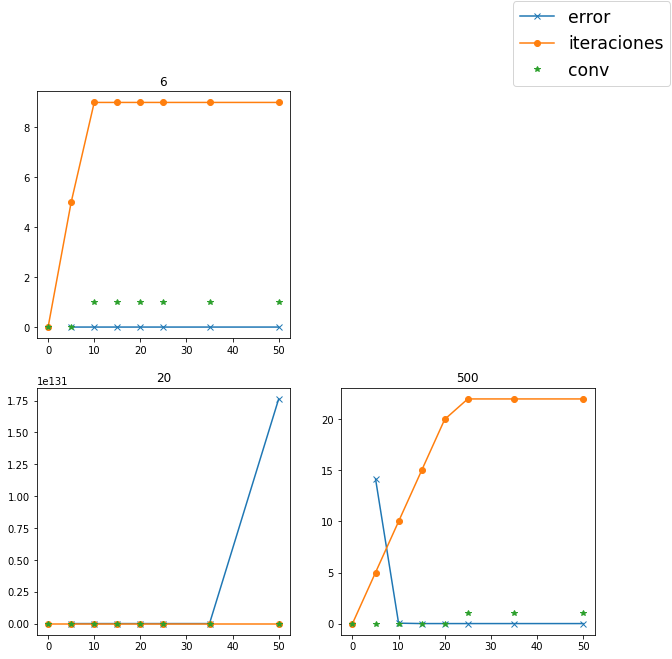

In [249]:

PLOT = True
if PLOT:
    rng = itr
    fig, ax = plt.subplots(2, 2, figsize=(10,10))
    ax[0,1].axis('off')
    
    for sz in sizes:
        if sz == '6': i,j = 0,0
        elif sz == '20': i,j = 1,0
        elif sz == '500': i,j = 1,1
        
        ax[i,j].set_title(sz)
        a = ax[i,j].plot(rng, data[sz][0], '-x')
        b = ax[i,j].plot(rng, data[sz][1], '-o')
        c = ax[i,j].plot(rng, data[sz][2], '*')    
    
    labels = ['error', 'iteraciones', 'conv']
    fig.legend([e, i, c],        # The line objects
           labels=labels,        # The labels for each line
           loc="upper right",    # Position of legend
           borderaxespad=0.1,    # Small spacing around legend box
           fontsize='xx-large'
           )
    
    plt.show()

En la figura anterior podemos ver como convergen, o no, el metodo para los distintos datos proporcionados. Se grafica el error, de manera directa; las iteraciones con las que termina el metodo; y si converge o no, donde 0 es no y 1 es si. Todos estos datos se grafican contra el limite superior de iteraciones que se le pasa al metodo.